In [1]:
import tensorflow as tf
import tensorflow.keras
import keras
from tensorflow.keras import backend as K

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt


Model Prepare

In [2]:
def mean_iou(y_true, y_pred):
  yt0 = y_true[:,:,:,0]
  yp0 = K.cast(y_pred[:,:,:,0] > 0.5, 'float32')
  inter = tf.math.count_nonzero(tf.logical_and(tf.equal(yt0, 1), tf.equal(yp0, 1)))
  union = tf.math.count_nonzero(tf.add(yt0, yp0))
  iou = tf.where(tf.equal(union, 0), 1., tf.cast(inter/union, 'float32'))
  return iou

In [3]:
model_name = 'Finished_unetModel.h5'

In [4]:
loaded_model = keras.models.load_model(model_name,custom_objects={'mean_iou':mean_iou})

In [5]:
def predict(path,name,loaded_model = loaded_model,output_dir="/Codes/Local/Python/Lihat.in/Segmented Data/"):
    raw = Image.open(path)
    raw = np.array(raw.resize((256,256)))/255.
    raw = raw[:,:,0:3]


    #Predict Mask
    pred = loaded_model.predict(np.expand_dims(raw, 0))

    msk = pred.squeeze()
    msk = np.stack((msk,)*3, axis=-1)
    msk[msk >= 0.5] = 1
    msk[msk < 0.5] = 0

    # combined = np.concatenate([raw, msk, raw*msk], axis = 1)
    result = (raw*msk)
    image = Image.fromarray(((result)*255).astype(np.uint8))
    image.save(output_dir+name)


Path Prepare

In [6]:
import os

In [7]:
os.mkdir("Segmented Data")

In [8]:
base_dir="Data"
output_dir = "/Codes/Local/Python/Lihat.in/Segmented Data/"

In [10]:
for target in os.listdir(base_dir):
    new_Outdir =output_dir+target+"/"

    if os.path.exists(new_Outdir)==False:
        os.mkdir(new_Outdir)

    for item in os.listdir(f"{base_dir}/{target}"):
        target_dir = f"{base_dir}/{target}/{item}"
        # print(item)

        predict(target_dir,item,output_dir=new_Outdir)

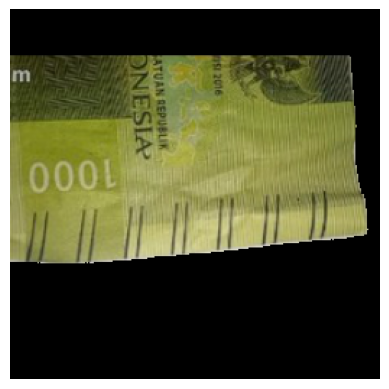

In [37]:
predict("D:/Codes/Local/Python/Lihat.in/Data/Rp1000/0.jpg")
    